# Text Classification
* 

In [239]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', header=0)
data.head(2)

,content,sentiment
0,"Great fun!, Got these last Christmas as a gag ...",1
1,"Inspiring, I hope a lot of people hear this cd...",1


In [3]:
data.shape

(33000, 2)

Text(0.5,1,'Sentiment Counts')

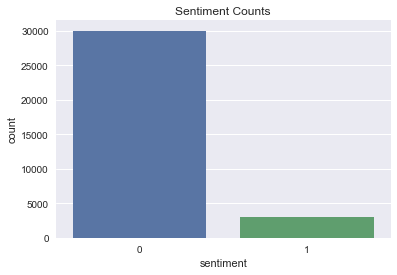

In [182]:
sns.countplot(data.sentiment)
plt.title("Sentiment Counts")

#### Positive to Negative class ratio is 1:10. For such case accuracy may not be a good metric. Metrics such as F1-score, Area under ROC should be evaluated. 

In [5]:
# a function to draw confusion matrix
def plotConfusion(df):
    plt.figure(figsize=(5,5))

    sns.heatmap(pd.DataFrame(df), 
                annot=True, fmt='.5g',annot_kws={"size":24}, 
                cmap="seismic", cbar=False)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### Simple model: text classification 
* Bag-of-word model
* Lets do 80/20 split for train and validation
* Using only unigrams
* Naive Bayes Classifier is usually good for text classification

In [6]:
#simple model text classification 

from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42) 



In [7]:
trainX.shape, validX.shape, trainY.shape, validY.shape

((26400,), (6600,), (26400,), (6600,))

Train Accuracy 0.966325757576
Validation Accuracy 0.953333333333
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      6042
          1       0.91      0.50      0.64       558

avg / total       0.95      0.95      0.95      6600



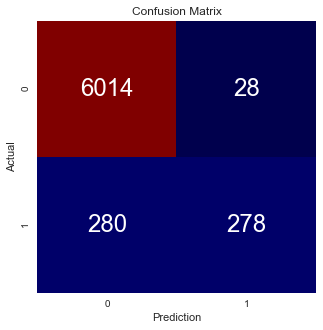

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer()  #unigram
bow=vec.fit(trainX.values)
#print(bow.shape)
X_train = vec.transform(trainX)
X_valid = vec.transform(validX)

#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB()
clf.fit(X_train,trainY)
print('Train Accuracy',clf.score(X_train,trainY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,clf.predict(X_valid))
plotConfusion(cm)



#### Let us try n-grams

Train Accuracy 0.985189393939
Validation Accuracy 0.918484848485
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      6042
          1       0.86      0.04      0.08       558

avg / total       0.91      0.92      0.88      6600



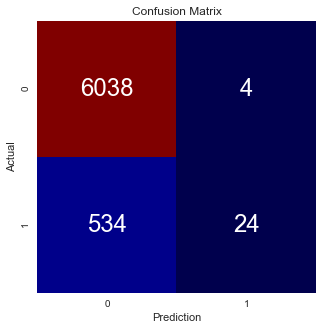

In [10]:
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer(ngram_range=(1,3))  #unigram
bow=vec.fit(trainX.values)
#print(bow.shape)
X_train = vec.transform(trainX)
X_valid = vec.transform(validX)

#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB()
clf.fit(X_train,trainY)
print('Train Accuracy',clf.score(X_train,trainY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,clf.predict(X_valid))
plotConfusion(cm)

#### Did not help much. Let us try some variation say fix the size of wordvectors

Train Accuracy 0.97053030303
Validation Accuracy 0.962121212121
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      6042
          1       0.75      0.83      0.79       558

avg / total       0.96      0.96      0.96      6600



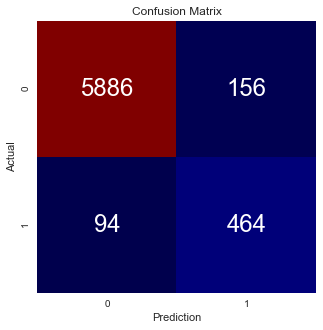

In [12]:
vec = CountVectorizer(max_features=8000)  #unigram
bow=vec.fit(data['content'].values)
#print(bow.shape)
X_train = vec.transform(trainX)
X_valid = vec.transform(validX)

#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB()
clf.fit(X_train,trainY)
print('Train Accuracy',clf.score(X_train,trainY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,clf.predict(X_valid))
plotConfusion(cm)

#### Try TF-IDF

Train Accuracy 0.938295454545
Validation Accuracy 0.937272727273
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      6042
          1       0.94      0.28      0.43       558

avg / total       0.94      0.94      0.92      6600



C:\Users\10257559\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


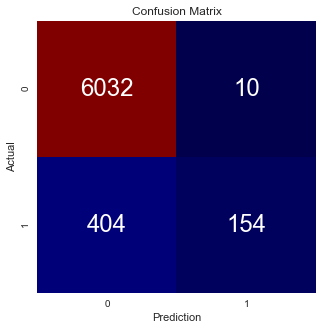

In [15]:
#tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) #ngram_range=(1,2))  #unigram
bow=tfidf.fit(data['content'].values)
#print(bow.shape)
X_train = tfidf.transform(trainX)
X_valid = tfidf.transform(validX)

#classifier Naive Bayes
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB(alpha=0.0)
clf.fit(X_train,trainY)
print('Train Accuracy',clf.score(X_train,trainY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,clf.predict(X_valid))
plotConfusion(cm)

#### Did not help

## Let us clean the text to see if it helps

In [27]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
def cleanText(line):
    line = line.lower()
    line = re.sub("[0-9]"," ",line) # remove numbers only
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(line)
    words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(words)
    #return line



In [29]:
data['cleanedTxt'] = data['content'].apply(cleanText)   #will take some time

In [197]:
trainX, validX, trainY, validY = train_test_split(data['cleanedTxt'].values, data['sentiment'].values, test_size=0.2, random_state=42) 

Train Accuracy 0.972878787879
Validation Accuracy 0.962424242424
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      6042
          1       0.75      0.82      0.79       558

avg / total       0.96      0.96      0.96      6600



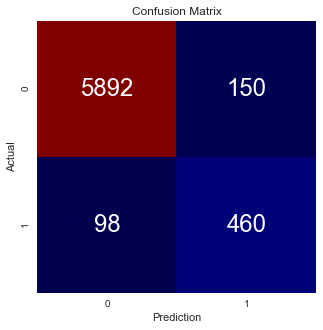

In [198]:
#apply tokenizer on 
vec = CountVectorizer(max_features=8000)#ngram_range=(1,3))  #unigram
bow=vec.fit(data['cleanedTxt'].values)
#print(bow.shape)
X_train = vec.transform(trainX)
X_valid = vec.transform(validX)

#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train,trainY)
print('Train Accuracy',clf.score(X_train,trainY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,clf.predict(X_valid))
plotConfusion(cm)

#### Similar result as before

#### Try some more algorithms

Train Accuracy 0.999734848485
Validation Accuracy 0.939848484848
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      6042
          1       0.91      0.32      0.47       558

avg / total       0.94      0.94      0.93      6600



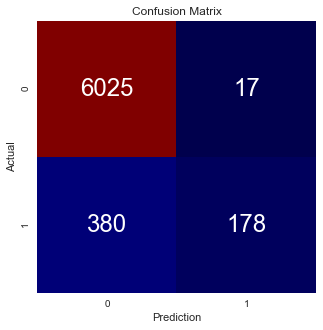

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=50)
rf.fit(X_train, trainY)
print('Train Accuracy', rf.score(X_train, trainY))
predictedY = rf.predict(X_valid)
print('Validation Accuracy', rf.score(X_valid, validY))

print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,predictedY)
plotConfusion(cm)

Train Accuracy 0.999431818182
Validation Accuracy 0.960151515152
trainConfusion matrix
[[23945    13]
 [    2  2440]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      6042
          1       0.76      0.77      0.76       558

avg / total       0.96      0.96      0.96      6600



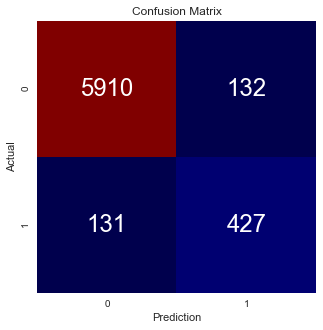

Area Under ROC 0.871692952202


In [61]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(2,),
                    activation='logistic',
                    max_iter=350
                   )
mlp.fit(X_train, trainY)
print('Train Accuracy', mlp.score(X_train, trainY))
predictedY = mlp.predict(X_valid)
print('Validation Accuracy', mlp.score(X_valid, validY))

print('trainConfusion matrix')
print(confusion_matrix(trainY, mlp.predict(X_train)))
print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,predictedY)
plotConfusion(cm)

from sklearn.metrics import roc_auc_score
print('Area Under ROC',roc_auc_score(validY,predictedY))

Train Accuracy 0.999848484848
Validation Accuracy 0.960757575758
trainConfusion matrix
[[23958     0]
 [    4  2438]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      6042
          1       0.77      0.77      0.77       558

avg / total       0.96      0.96      0.96      6600



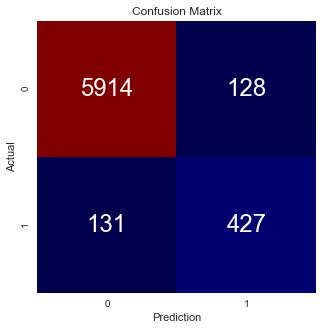

Area Under ROC 0.872023968422


In [196]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,),
                    activation='logistic',
                    max_iter=350
                   )
X_train = vec.transform(trainX)
X_valid = vec.transform(validX)
mlp.fit(X_train, trainY)
print('Train Accuracy', mlp.score(X_train, trainY))
predictedY = mlp.predict(X_valid)
print('Validation Accuracy', mlp.score(X_valid, validY))

print('trainConfusion matrix')
print(confusion_matrix(trainY, mlp.predict(X_train)))
print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,predictedY)
plotConfusion(cm)

from sklearn.metrics import roc_auc_score
print('Area Under ROC',roc_auc_score(validY,predictedY))

Train Accuracy 0.962462121212
Validation Accuracy 0.956515151515
trainConfusion matrix
[[23901    57]
 [  934  1508]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      6042
          1       0.92      0.53      0.67       558

avg / total       0.96      0.96      0.95      6600



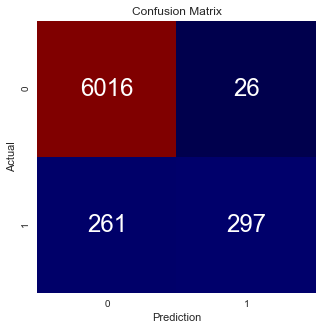

Area Under ROC 0.763977426829


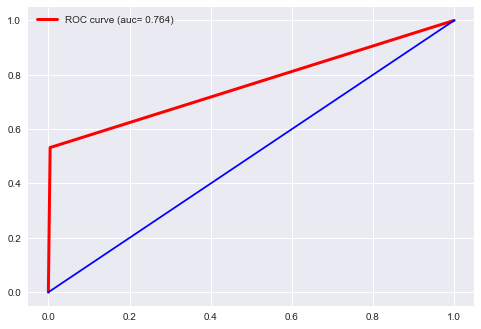

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, trainY)
print('Train Accuracy', lr.score(X_train, trainY))
predictedY = lr.predict(X_valid)
print('Validation Accuracy', lr.score(X_valid, validY))

print('trainConfusion matrix')
print(confusion_matrix(trainY, lr.predict(X_train)))
print(classification_report(validY, predictedY))

cm=confusion_matrix(validY,predictedY)
plotConfusion(cm)

from sklearn.metrics import roc_auc_score
print('Area Under ROC',roc_auc_score(validY,predictedY))
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(validY, predictedY)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='r', lw=3, label='ROC curve (auc= %0.3f)'%roc_auc)
plt.plot([0,1],[0,1], 'b-')
plt.legend(loc='best')
plt.show()

#### Most of the algorithms provide similary accuracy/Metrics

# Dealing with imbalanced Classes 
#### Try undersampling 
In the train set, let us make 10 different sets of randomly picked negative classes (0) and train each with all positive classes. And validate on test set. 


In [81]:
indexForTestData = np.random.choice(data.index.values, int(0.2*len(data)))

In [82]:
len(indexForTestData)

6600

In [110]:
testData = data.iloc[indexForTestData]

In [111]:
trainData = data.iloc[~data.index.isin(indexForTestData)]

In [112]:
testData.shape, trainData.shape

((6600, 3), (27026, 3))

In [116]:
trainData.head()

,content,sentiment,cleanedTxt
0,"Great fun!, Got these last Christmas as a gag ...",1,great fun got last christmas gag gift great fu...
1,"Inspiring, I hope a lot of people hear this cd...",1,inspiring hope lot people hear cd need strong ...
2,"Great CD, My lovely Pat has one of the GREAT v...",1,great cd lovely pat one great voices generatio...
3,"First album I've bought since Napster, We've c...",1,first album bought since napster come long way...
4,"Amazing!, I used to find myself starting Chron...",1,amazing used find starting chrono cross time t...


In [114]:
testData.head()

,content,sentiment,cleanedTxt
20763,"I wish I could pluck out my eyes., Based on th...",0,wish could pluck eyes based current rating mov...
31581,"Verdict from 2002, A lot has transpired since ...",0,verdict lot transpired since richard rovere di...
13541,"BUYER BEWARE, I bought this Toshiba DVD Player...",0,buyer beware bought toshiba dvd player seven m...
16418,"Pre-Historic Nancy Drew meets Kama Sutra, What...",0,pre historic nancy drew meets kama sutra disap...
19572,"Wish they still made Peaceful Planet, I recent...",0,wish still made peaceful planet recently bough...


In [142]:
trainDataPos = trainData[trainData['sentiment']==1].reset_index(drop=True)
trainDataNeg = trainData[trainData['sentiment']==0].reset_index(drop=True)

In [143]:
trainDataPos.shape, trainDataNeg.shape

((2458, 3), (24568, 3))

In [172]:
#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

X_valid = vec.transform(testData['cleanedTxt'].values)
y_valid = testData['sentiment'].values

prediction = np.zeros((testData.shape[0], 10))


for i in range(10):
    ind = np.random.choice(trainDataNeg.index.values, 5000)
    print(i)
    negativeSamples = trainDataNeg.iloc[ind]
    trainDF = pd.concat([negativeSamples,trainDataPos]).reset_index(drop=True)
    X_train = vec.transform(trainDF['cleanedTxt'].values)
    y_train = trainDF['sentiment'].values
    clf = MultinomialNB(alpha=0.5)
    clf.fit(X_train,y_train)
    print('Train Accuracy',clf.score(X_train,y_train))
    prediction[:,i] = clf.predict(X_valid)
    print('Validation Accuracy', clf.score(X_valid, y_valid))
    print(classification_report(y_valid, prediction[:,i]))



0
Train Accuracy 0.963663180477
Validation Accuracy 0.937121212121
             precision    recall  f1-score   support

          0       0.99      0.94      0.96      5998
          1       0.60      0.90      0.72       602

avg / total       0.95      0.94      0.94      6600

1
Train Accuracy 0.959372485921
Validation Accuracy 0.939545454545
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      5998
          1       0.62      0.90      0.73       602

avg / total       0.96      0.94      0.94      6600

2
Train Accuracy 0.959104317511
Validation Accuracy 0.935303030303
             precision    recall  f1-score   support

          0       0.99      0.94      0.96      5998
          1       0.60      0.90      0.72       602

avg / total       0.95      0.94      0.94      6600

3
Train Accuracy 0.957495307053
Validation Accuracy 0.938181818182
             precision    recall  f1-score   support

          0       0.99      0.94 

#### Undersampling did not help improve the model performance.

# DeepLearning !!
Let us try a simple RNN (LSTM) model

In [201]:
from keras.models import Model
from keras import layers 
from keras.preprocessing import text, sequence
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [200]:
trainX, validX, trainY, validY = train_test_split(data['content'].values, data['sentiment'].values,
                                                  test_size=0.2, random_state=42) 

In [227]:
#tokenizer: converting text to sequences 
max_words = 1000
max_len = 150
tokenized = text.Tokenizer(num_words = max_words)
tokenized.fit_on_texts(trainX)
train_seq = tokenized.texts_to_sequences(trainX)
train_seq_matrix = sequence.pad_sequences(train_seq, maxlen=max_len)

test_seq = tokenized.texts_to_sequences(validX)
test_seq_matrix = sequence.pad_sequences(test_seq, maxlen=max_len)

#RNN model
def LSTM():
    inputs = layers.Input(name='input_layer', shape=[max_len]) #input Layer
    layer = layers.Embedding(max_words, 50, input_length=max_len)(inputs) #word embedding layer
    lstm_layer = layers.LSTM(64)(layer) # LSTM layer
    
    #output layers
    out_layer = layers.Dense(256, activation='relu')(lstm_layer)
    out_layer = layers.Dropout(0.2)(out_layer)
    out_layer = layers.Dense(1,name='out_layer', activation='sigmoid')(out_layer)
    
    model = Model(inputs=inputs, outputs=out_layer)
    
    return model

In [259]:
model = LSTM()
#model.summary()

In [229]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop())

In [ ]:
model.fit(train_seq_matrix, trainY, epochs=50) #, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001)])

Epoch 1/50
26400/26400 [==============================] - 167s - loss: 0.0968   
Epoch 2/50
26400/26400 [==============================] - 159s - loss: 0.0928   
Epoch 3/50
26400/26400 [==============================] - 154s - loss: 0.0879   
Epoch 4/50
26400/26400 [==============================] - 133s - loss: 0.0831   
Epoch 5/50
26400/26400 [==============================] - 129s - loss: 0.0811   
Epoch 6/50
26400/26400 [==============================] - 148s - loss: 0.0765   
Epoch 7/50
26400/26400 [==============================] - 143s - loss: 0.0722   
Epoch 8/50
26400/26400 [==============================] - 143s - loss: 0.0702   
Epoch 9/50
26400/26400 [==============================] - 151s - loss: 0.0669   
Epoch 10/50
26400/26400 [==============================] - 153s - loss: 0.0636   
Epoch 11/50
26400/26400 [==============================] - 147s - loss: 0.0603   
Epoch 12/50
26400/26400 [==============================] - 151s - loss: 0.0559   
Epoch 13/50
26400/26400 [

In [240]:
predict = model.predict(test_seq_matrix)

In [241]:
for i in range(len(predict)):
    if predict[i]>0.5: 
        predict[i]=1.0
    else:
        predict[i]=0.0
            

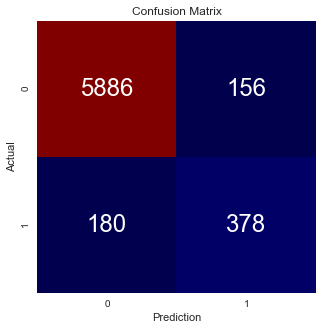

In [242]:
cm=confusion_matrix(validY,predict)
plotConfusion(cm)

Area Under ROC 0.825800044847


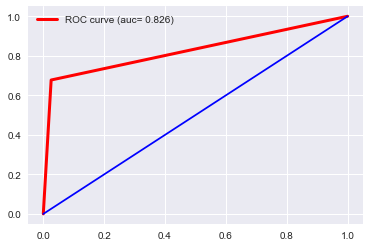

In [251]:
from sklearn.metrics import roc_auc_score
print('Area Under ROC',roc_auc_score(validY,predict))
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(validY, predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='r', lw=3, label='ROC curve (auc= %0.3f)'%roc_auc)
plt.plot([0,1],[0,1], 'b-')
plt.legend(loc='best')
plt.show()

#### LSTM has similar performance as well

# Let us pick our simple and nice model and try different train/test split 
#### 70/30

Train Accuracy 0.968701298701
Validation Accuracy 0.958383838384
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      9011
          1       0.75      0.81      0.78       889

avg / total       0.96      0.96      0.96      9900



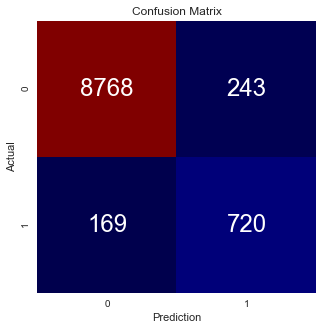

Area Under ROC 0.891465861185


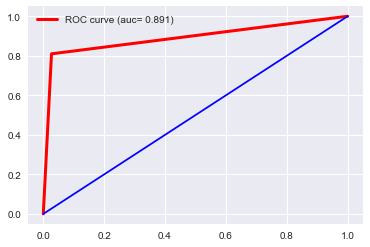

In [261]:
trX, teX, trY, teY = train_test_split(data['cleanedTxt'].values, data['sentiment'].values,
                                                  test_size=0.3, random_state=42) 
vec = CountVectorizer(max_features=8000)  #unigram
bow=vec.fit(trX)
#print(bow.shape)
X_train = vec.transform(trX)
X_valid = vec.transform(teX)

#classifier Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
clf = MultinomialNB()
clf.fit(X_train,trY)
print('Train Accuracy',clf.score(X_train,trY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, teY))

print(classification_report(teY, predictedY))

cm=confusion_matrix(teY,predictedY)
plotConfusion(cm)

print('Area Under ROC',roc_auc_score(teY,predictedY))

fpr, tpr, threshold = roc_curve(teY, predictedY)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='r', lw=3, label='ROC curve (auc= %0.3f)'%roc_auc)
plt.plot([0,1],[0,1], 'b-')
plt.legend(loc='best')
plt.show()

#### 90/10

Train Accuracy 0.968316498316
Validation Accuracy 0.963636363636
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3013
          1       0.77      0.84      0.80       287

avg / total       0.97      0.96      0.96      3300



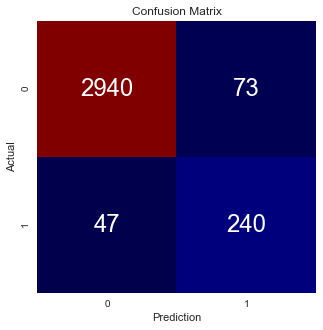

Area Under ROC 0.906004294977


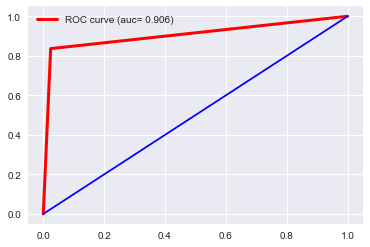

In [262]:
trX, teX, trY, teY = train_test_split(data['cleanedTxt'].values, data['sentiment'].values,
                                                  test_size=0.1, random_state=42) 
bow=vec.fit(trX)
#print(bow.shape)
X_train = vec.transform(trX)
X_valid = vec.transform(teX)

clf.fit(X_train,trY)
print('Train Accuracy',clf.score(X_train,trY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, teY))

print(classification_report(teY, predictedY))

cm=confusion_matrix(teY,predictedY)
plotConfusion(cm)

print('Area Under ROC',roc_auc_score(teY,predictedY))

fpr, tpr, threshold = roc_curve(teY, predictedY)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='r', lw=3, label='ROC curve (auc= %0.3f)'%roc_auc)
plt.plot([0,1],[0,1], 'b-')
plt.legend(loc='best')
plt.show()

Train Accuracy 0.968261562998
Validation Accuracy 0.960606060606
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1510
          1       0.73      0.85      0.79       140

avg / total       0.96      0.96      0.96      1650



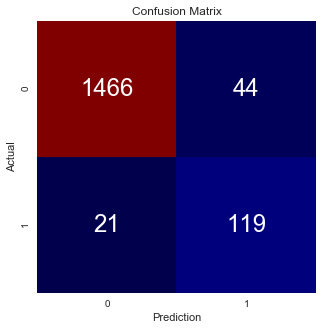

Area Under ROC 0.910430463576


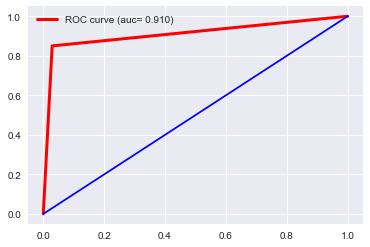

In [263]:
trX, teX, trY, teY = train_test_split(data['cleanedTxt'].values, data['sentiment'].values,
                                                  test_size=0.05, random_state=42) 
bow=vec.fit(trX)
#print(bow.shape)
X_train = vec.transform(trX)
X_valid = vec.transform(teX)

clf.fit(X_train,trY)
print('Train Accuracy',clf.score(X_train,trY))
predictedY = clf.predict(X_valid)
print('Validation Accuracy', clf.score(X_valid, teY))

print(classification_report(teY, predictedY))

cm=confusion_matrix(teY,predictedY)
plotConfusion(cm)

print('Area Under ROC',roc_auc_score(teY,predictedY))

fpr, tpr, threshold = roc_curve(teY, predictedY)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='r', lw=3, label='ROC curve (auc= %0.3f)'%roc_auc)
plt.plot([0,1],[0,1], 'b-')
plt.legend(loc='best')
plt.show()

#### 90/10 or 95/05 looks good and it makes sense as we are training our model with more information